In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 데이터 경로 변수

In [2]:
DATA_PATH = "/content/drive/MyDrive/the_datas/data/"
DATA_PATH

'/content/drive/MyDrive/the_datas/data/'

- 시드값

In [3]:

SEED = 42

- 데이터 불러오기

In [4]:
import pandas as pd
import numpy as np

train_tr = pd.read_csv(f"{DATA_PATH}train_tr_common_1.csv") # 학습용 구매기록 데이터
train_target = pd.read_csv(f"{DATA_PATH}store_train.csv") # 학습용 정답 데이터
test_tr = pd.read_csv(f"{DATA_PATH}test_tr_common_1.csv") # 테스트용 구매기록 데이터
submit = pd.read_csv(f"{DATA_PATH}store_submission.csv") # 제출 양식 데이터

train_tr.shape , train_target.shape , test_tr.shape , submit.shape

((523105, 12), (14940, 2), (441196, 12), (12225, 2))

- 공통 피처 파일 불러오기

In [60]:
train_ft = pd.read_csv(f"{DATA_PATH}train_common_2_삭제완료.csv") # 학습 데이터(피처)
test_ft = pd.read_csv(f"{DATA_PATH}test_common_2_삭제완료.csv") # 테스트 데이터(피처)

train_ft.shape , test_ft.shape

((14940, 479), (12225, 479))

# 결측치 처리

In [61]:
mask = train_ft.isnull().sum() > 0
train_ft.isnull().sum()[mask]

,0
일별구매횟수표준편차,664
3회이상count,4214
총_생식품_구매가격,9711
평균_생식품_구매가격,1574
구매금액표준편차,388
구매금액왜도,840
구매금액첨도,1265


In [62]:

mask = test_ft.isnull().sum() > 0
test_ft.isnull().sum()[mask]

,0
일별구매횟수표준편차,443
3회이상count,3284
총_생식품_구매가격,7820
평균_생식품_구매가격,1257
구매금액표준편차,242
구매금액왜도,599
구매금액첨도,954


In [63]:
train_ft["구매금액표준편차"] = train_ft["구매금액표준편차"].fillna(0)
train_ft["구매금액왜도"] = train_ft["구매금액왜도"].fillna(0)
train_ft["구매금액첨도"] = train_ft["구매금액첨도"].fillna(0)

test_ft["구매금액표준편차"] = test_ft["구매금액표준편차"].fillna(0)
test_ft["구매금액왜도"] = test_ft["구매금액왜도"].fillna(0)
test_ft["구매금액첨도"] = test_ft["구매금액첨도"].fillna(0)

In [64]:
train_ft["총_생식품_구매가격"] = train_ft["총_생식품_구매가격"].fillna(0)
train_ft["평균_생식품_구매가격"] = train_ft["평균_생식품_구매가격"].fillna(0)
train_ft["3회이상count"] = train_ft["3회이상count"].fillna(0)


test_ft["총_생식품_구매가격"] = test_ft["총_생식품_구매가격"].fillna(0)
test_ft["평균_생식품_구매가격"] = test_ft["평균_생식품_구매가격"].fillna(0)
test_ft["3회이상count"] = test_ft["3회이상count"].fillna(0)


In [65]:
train_ft["일별구매횟수표준편차"] = train_ft["일별구매횟수표준편차"].fillna(0)
test_ft["일별구매횟수표준편차"] = test_ft["일별구매횟수표준편차"].fillna(0)

In [66]:
# train_ft["2004-05월_count_diff"] = train_ft["2004-05월_count_diff"].fillna(0)
# test_ft["2004-05월_count_diff"] = test_ft["2004-05월_count_diff"].fillna(0)

In [67]:
# train_ft["월별_구매총액_변화비율_1_12"] = train_ft["월별_구매총액_변화비율_1_12"].fillna(0)
# test_ft["월별_구매총액_변화비율_1_12"] = test_ft["월별_구매총액_변화비율_1_12"].fillna(0)
# for i in range(1,12):
#     train_ft[f"월별_구매총액_변화_비율{i+1}_{i}"] = train_ft[f"월별_구매총액_변화_비율{i+1}_{i}"].fillna(0)
#     test_ft[f"월별_구매총액_변화_비율{i+1}_{i}"] = test_ft[f"월별_구매총액_변화_비율{i+1}_{i}"].fillna(0)

In [68]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(0, 0)

# 특성 공학(Feature Engineering)

- ID 변수 제외

In [69]:
train_ft = train_ft.iloc[:,1:]
test_ft = test_ft.iloc[:,1:]
train_ft.shape, test_ft.shape

((14940, 478), (12225, 478))

- 추가 피처 만들어 보기

In [70]:
cols = [ col for col in train_ft.columns if col.startswith("수정_중_pivot_횟수비율_") ]

In [71]:
train_ft["수정_중분류별_구매횟수비율_std"] = train_ft[cols].std(axis=1)
train_ft["수정_중분류별_구매횟수비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["수정_중분류별_구매횟수비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["수정_중분류별_구매횟수비율_std"] = test_ft[cols].std(axis=1)
test_ft["수정_중분류별_구매횟수비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["수정_중분류별_구매횟수비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 481), (12225, 481))

## Feature Encoding

In [72]:
train_ft.shape, test_ft.shape

((14940, 481), (12225, 481))

In [73]:
cols = train_ft.select_dtypes("object").columns.tolist()
train_ft[cols].nunique()

,0
주구매지점,4
주구매_수정_중분류,246
주구매_대분류,28
최대구매액_대분류,28
최소구매액_대분류,28


In [74]:
%pip install category_encoders

In [75]:
import category_encoders as ce

In [76]:
enc = ce.one_hot.OneHotEncoder()
tmp = enc.fit_transform(train_ft[["주구매지점","주구매_대분류", "최소구매액_대분류", "최대구매액_대분류"]])
train_ft = pd.concat([train_ft,tmp],axis =1)

tmp = enc.transform(test_ft[["주구매지점","주구매_대분류", "최소구매액_대분류", "최대구매액_대분류"]])
test_ft = pd.concat([test_ft,tmp],axis =1)

train_ft.shape, test_ft.shape

((14940, 569), (12225, 569))

In [77]:
enc = ce.count.CountEncoder()
train_ft["주구매_수정_중분류_cnt"] = enc.fit_transform(train_ft[["주구매_수정_중분류"]])
test_ft["주구매_수정_중분류_cnt"] = enc.transform(test_ft[["주구매_수정_중분류"]])

train_ft.shape, test_ft.shape

((14940, 570), (12225, 570))

- 문자열 피처 삭제

In [78]:
cols

['주구매지점', '주구매_수정_중분류', '주구매_대분류', '최대구매액_대분류', '최소구매액_대분류']

In [79]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)
train_ft.shape, test_ft.shape

((14940, 565), (12225, 565))

In [80]:
train_ft.select_dtypes("object").columns , test_ft.select_dtypes("object").columns

(Index([], dtype='object'), Index([], dtype='object'))

## Inf 값 처리

In [81]:
mask = np.isinf(train_ft).sum() > 0
np.isinf(train_ft).sum()[mask]

,0


In [82]:
mask = np.isinf(test_ft).sum() > 0
np.isinf(test_ft).sum()[mask]

,0


In [83]:
cols = np.isinf(train_ft).sum()[mask].index
cols

Index([], dtype='object')

In [84]:
# train_inf = train_ft[cols].copy()
# train_inf[np.isinf(train_inf)] = np.nan  # 무한대를 NaN으로 대체
# train_inf = np.nan_to_num(train_inf, nan=np.nanmax(train_inf[~np.isinf(train_inf)]))
# np.isinf(train_inf).sum().sum()

In [85]:
# test_inf = test_ft[cols].copy()
# test_inf[np.isinf(test_inf)] = np.nan  # 무한대를 NaN으로 대체
# test_inf = np.nan_to_num(test_inf, nan=np.nanmax(test_inf[~np.isinf(test_inf)]))
# np.isinf(test_inf).sum().sum()

In [86]:
# train_ft[cols] = train_inf
# test_ft[cols] = test_inf


In [87]:
np.isinf(train_ft).sum().sum(), np.isinf(test_ft).sum().sum()

(0, 0)

## Feature Scaling

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [89]:
train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)
train_ft.head()

,거래횟수,내점일수,구매주기,봄_구매비율,여름_구매비율,가을_구매비율,겨울_구매비율,주구매요일,일별평균구매건수,거래개월수,...,최대구매액_대분류_20,최대구매액_대분류_21,최대구매액_대분류_22,최대구매액_대분류_23,최대구매액_대분류_24,최대구매액_대분류_25,최대구매액_대분류_26,최대구매액_대분류_27,최대구매액_대분류_28,주구매_수정_중분류_cnt
0,-0.437126,-0.369867,0.002987,-1.029777,0.001191,0.838272,0.338186,0.109631,-0.057297,0.017620,...,-0.131248,-0.07785,-0.1402,-0.200973,-0.090737,-0.071977,-0.146044,-0.067118,-0.050497,-0.726970
1,0.239394,0.144110,-0.356452,0.323951,-0.390607,0.620171,-0.552996,0.109631,0.222706,1.176010,...,-0.131248,-0.07785,-0.1402,-0.200973,-0.090737,-0.071977,-0.146044,-0.067118,-0.050497,-0.510078
2,1.890101,1.943028,-0.869935,0.798943,-0.514333,-0.304527,-0.059266,-1.643370,0.277707,1.465608,...,-0.131248,-0.07785,-0.1402,-0.200973,-0.090737,-0.071977,-0.146044,-0.067118,-0.050497,-0.848408
3,4.298510,3.793345,-1.023980,0.420933,-0.327474,0.008592,-0.135636,0.109631,0.674668,1.465608,...,-0.131248,-0.07785,-0.1402,-0.200973,-0.090737,-0.071977,-0.146044,-0.067118,-0.050497,1.523851
4,0.618244,0.452496,-0.613193,-0.752532,1.707410,-0.130285,-0.821561,0.693965,0.679008,0.886413,...,-0.131248,-0.07785,-0.1402,-0.200973,-0.090737,-0.071977,-0.146044,-0.067118,-0.050497,-0.833157


# 정답 데이터

In [90]:
target = train_target["target"]
target

,target
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
14935,0.0
14936,0.0
14937,0.0
14938,1.0


# cv 점수 확인해보기

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=5,shuffle=True, random_state=SEED)

In [92]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='f1_macro',n_jobs = -1)
np.mean(scores)

0.7149713264621779

In [93]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=SEED)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='f1_macro',n_jobs = -1)
np.mean(scores)

0.7048321343992794

# 모델 학습

In [94]:
model = LGBMClassifier(random_state=SEED)
model.fit(train_ft,target)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 57801
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 545
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


LGBMClassifier(random_state=42)

In [100]:
pip install shap

In [101]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (24.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123623 files and direc

In [102]:
import shap

In [103]:
explainer = shap.TreeExplainer(model)

In [104]:
shap_values = explainer.shap_values(test_ft)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


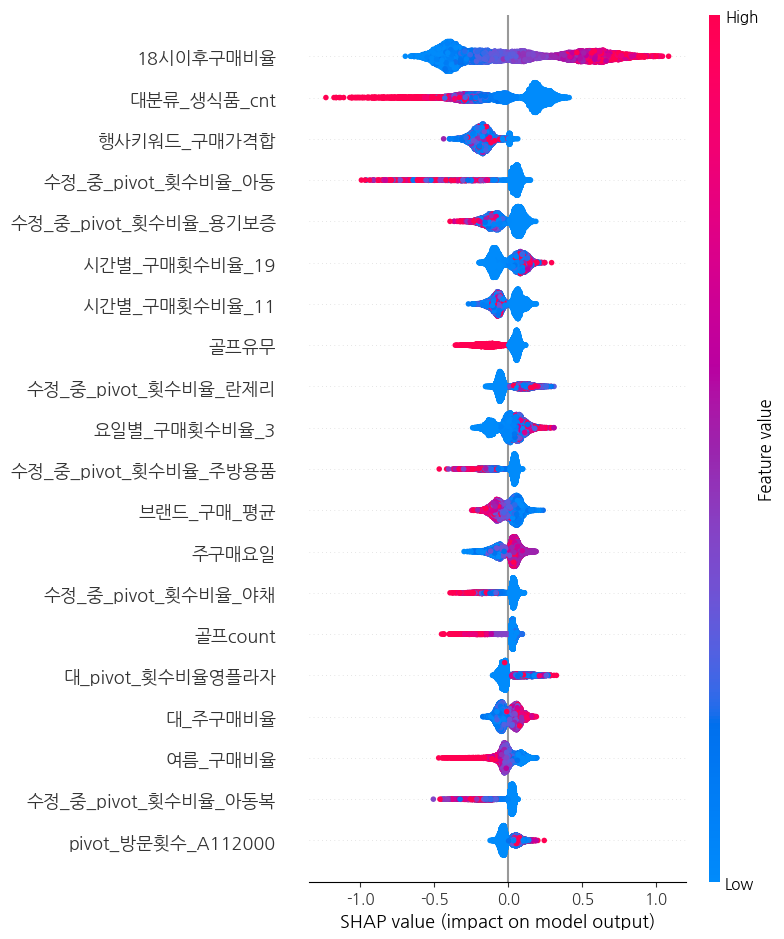

In [105]:
shap.summary_plot(shap_values, test_ft)

# 테스트 데이터 예측

In [95]:
pred = model.predict(test_ft)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [96]:
# pred_proba = model.predict_proba(test_ft)[:,1]
# pred_proba

# 평가를 위한 제출 파일 생성
- 예측 결과를 target 컬럼에 넣어 csv 파일로 저장후에 제출한다.

In [97]:
submit

,ID,target
0,test_0,0.0
1,test_1,0.0
2,test_2,0.0
3,test_3,1.0
4,test_4,1.0
...,...,...
12220,test_12220,1.0
12221,test_12221,0.0
12222,test_12222,0.0
12223,test_12223,0.0


In [98]:
submit["target"] = pred
submit

,ID,target
0,test_0,0.0
1,test_1,0.0
2,test_2,0.0
3,test_3,1.0
4,test_4,1.0
...,...,...
12220,test_12220,1.0
12221,test_12221,0.0
12222,test_12222,0.0
12223,test_12223,0.0


- 예측 결과를 csv 파일로 저장하여 제출

In [99]:
submit.to_csv(f"{DATA_PATH}submit_6_기준_중분류만.csv",index=False)